# Industrial Fault Detection Dataset

## IoT Sensor Data for Fault Classification

Этот набор данных предназначен для автоматического обнаружения неисправностей в приложениях Industry 4.0 с использованием интеллектуальных датчиков на базе IoT. Он содержит данные промышленных датчиков, собранные из различных источников, в том числе:

- Датчики температуры (°C)
- Датчики вибрации (м/с²)
- Датчики давления (кПа)
- Датчики расхода (л/мин)
- Датчики тока (А)
- Датчики напряжения (В)

Набор данных включает метку Fault_Type с четырьмя категориями:
- 0 → Отсутствие неисправности (нормальная работа)
- 1 → Неисправность, связанная с перегревом
- 2 → Неисправность, связанная с утечкой
- 3 → Неисправность, связанная с колебаниями напряжения

In [221]:
from pathlib import Path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(Path("../config.py").resolve()), "../../..")))

from config import PATH_DATASET_FOR_ANALYSE, PATH_DATASET_WITH_NAN

In [93]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
df = pd.read_csv(PATH_DATASET_FOR_ANALYSE)
# df['Time'] = pd.to_datetime(df['Time'])
df

,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0
1,62.529168,2.573668,76.159843,8.279230,14.906390,215.465859,767.602396,32.395556,962.481517,8.365137,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0
2,77.295015,3.243491,92.372614,9.172789,15.054051,202.043568,765.965069,32.032039,956.299456,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0
3,76.564164,3.142904,94.149558,13.775375,16.417891,216.699098,763.936438,33.039854,956.532232,10.251866,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0
4,78.281641,3.139960,94.441006,11.113106,10.899425,227.328291,746.754887,33.018729,950.212816,18.313107,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,10.056915,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
996,75.584630,3.035014,96.951461,5.844376,17.134232,231.526481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
997,77.158833,2.925378,98.544780,9.359404,24.338731,207.825962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [195]:
df.describe()

,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,75.005231,3.031611,99.941285,9.962562,14.852179,219.532624,743.341660,30.040517,990.914374,13.380862,...,13.485003,1.407981,27.365195,13.794890,1.343784,28.467125,13.380862,1.366214,26.663102,0.54800
std,2.589552,0.229013,4.786313,2.054265,2.977141,10.073892,76.279123,3.381390,104.195516,7.575540,...,7.354691,0.784946,14.496355,6.883526,0.752309,14.738399,7.575540,0.773887,13.816337,0.98624
min,45.642247,1.621016,56.775766,4.141103,5.469889,191.004861,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,73.646389,2.889862,97.210298,8.525159,12.952185,213.063072,739.929669,29.373035,977.893443,7.797295,...,7.723230,0.820963,16.419843,8.696436,0.730487,18.017646,7.797295,0.757553,16.362899,0.00000
50%,75.024788,3.040625,99.960094,10.000369,14.945274,219.571729,749.858285,30.301256,1000.647013,11.763062,...,12.593611,1.327057,26.814791,13.036775,1.266797,26.963425,11.763062,1.315847,25.033779,0.00000
75%,76.461058,3.183112,102.804323,11.333891,16.917369,226.124468,760.311771,31.382411,1020.789527,17.941615,...,18.457455,1.885926,36.506143,18.325558,1.844989,37.761450,17.941615,1.855076,35.553201,1.00000
max,82.164581,3.784214,112.127236,16.486186,24.338731,250.982994,797.331727,35.695763,1091.536311,39.545666,...,35.201297,4.533237,82.444429,40.499074,3.821221,83.637726,39.545666,4.106315,70.921075,3.00000


In [194]:
df.columns

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')

## Analyse dataset

In [ ]:
from itertools import combinations


```сильная связь```

In [189]:
df_corr = df.corr()
for col1, col2 in combinations(df_corr.columns, 2):
    corr_value = df_corr.loc[col1, col2]
    if (np.abs(corr_value) >= 0.8) & (np.abs(corr_value) < 1):
        print(f'{col1:20} {col2:20} corr={corr_value:.3f}')

for i in range(4):
    df_corr = df[df['Fault_Type'] == i].corr()
    print(f'Fault_Type == {i}')
    for col1, col2 in combinations(df_corr.columns, 2):
        corr_value = df_corr.loc[col1, col2]
        if (np.abs(corr_value) >= 0.8) & (np.abs(corr_value) < 1):
            print(f'{col1:20} {col2:20} corr={corr_value:.3f}')
    print('\n')

FFT_Temp_0           FFT_Vib_0            corr=0.870
FFT_Temp_0           FFT_Pres_0           corr=0.936
FFT_Vib_0            FFT_Pres_0           corr=0.856
Fault_Type == 0
FFT_Temp_0           FFT_Vib_0            corr=0.879
FFT_Temp_0           FFT_Pres_0           corr=0.944
FFT_Vib_0            FFT_Pres_0           corr=0.868


Fault_Type == 1
FFT_Temp_0           FFT_Vib_0            corr=0.889
FFT_Temp_0           FFT_Pres_0           corr=0.928
FFT_Vib_0            FFT_Pres_0           corr=0.864


Fault_Type == 2
FFT_Temp_0           FFT_Vib_0            corr=0.877
FFT_Temp_0           FFT_Pres_0           corr=0.948
FFT_Vib_0            FFT_Pres_0           corr=0.868


Fault_Type == 3




```средняя связь```

In [190]:
df_corr = df.corr()
for col1, col2 in combinations(df_corr.columns, 2):
    corr_value = df_corr.loc[col1, col2]
    if (np.abs(corr_value) >= 0.4) & (np.abs(corr_value) < 0.8):
        print(f'{col1:20} {col2:20} corr={corr_value:.3f}')

for i in range(4):
    df_corr = df[df['Fault_Type'] == i].corr()
    print(f'Fault_Type == {i}')
    for col1, col2 in combinations(df_corr.columns, 2):
        corr_value = df_corr.loc[col1, col2]
        if (np.abs(corr_value) >= 0.4) & (np.abs(corr_value) < 0.8):
            print(f'{col1:20} {col2:20} corr={corr_value:.3f}')
    print('\n')

Fault_Type == 0


Fault_Type == 1


Fault_Type == 2


Fault_Type == 3
Temperature          FFT_Temp_0           corr=0.466
Vibration            FFT_Vib_0            corr=0.493
Pressure             FFT_Pres_0           corr=0.511




```слабая связь```

In [192]:
df_corr = df.corr()
for col1, col2 in combinations(df_corr.columns, 2):
    corr_value = df_corr.loc[col1, col2]
    if (np.abs(corr_value) >= 0.2) & (np.abs(corr_value) < 0.4):
        print(f'{col1:20} {col2:20} corr={corr_value:.3f}')

for i in range(4):
    df_corr = df[df['Fault_Type'] == i].corr()
    print(f'Fault_Type == {i}')
    for col1, col2 in combinations(df_corr.columns, 2):
        corr_value = df_corr.loc[col1, col2]
        if (np.abs(corr_value) >= 0.2) & (np.abs(corr_value) < 0.4):
            print(f'{col1:20} {col2:20} corr={corr_value:.3f}')
    print('\n')

Temperature          Pressure             corr=0.233
Temperature          FFT_Temp_0           corr=0.266
Temperature          FFT_Pres_0           corr=0.204
Pressure             FFT_Pres_0           corr=0.234
FFT_Temp_0           FFT_Temp_2           corr=0.217
FFT_Temp_0           FFT_Temp_8           corr=0.217
FFT_Vib_0            FFT_Temp_3           corr=0.224
FFT_Vib_0            FFT_Temp_4           corr=0.222
FFT_Vib_0            FFT_Temp_6           corr=0.222
FFT_Vib_0            FFT_Temp_7           corr=0.224
FFT_Pres_0           FFT_Pres_3           corr=0.225
FFT_Pres_0           FFT_Temp_4           corr=0.215
FFT_Pres_0           FFT_Temp_6           corr=0.215
FFT_Pres_0           FFT_Pres_7           corr=0.225
Fault_Type == 0
Temperature          Pressure             corr=0.299
Temperature          FFT_Temp_0           corr=0.285
Temperature          FFT_Pres_0           corr=0.233
Vibration            FFT_Vib_0            corr=0.217
Pressure             FFT_Pres_

In [193]:
df_corr = df.corr()
for col1, col2 in combinations(df_corr.columns, 2):
    corr_value = df_corr.loc[col1, col2]
    if (np.abs(corr_value) >= 0.1) & (np.abs(corr_value) < 0.2):
        print(f'{col1:20} {col2:20} corr={corr_value:.3f}')

for i in range(4):
    df_corr = df[df['Fault_Type'] == i].corr()
    print(f'Fault_Type == {i}')
    for col1, col2 in combinations(df_corr.columns, 2):
        corr_value = df_corr.loc[col1, col2]
        if (np.abs(corr_value) >= 0.1) & (np.abs(corr_value) < 0.2):
            print(f'{col1:20} {col2:20} corr={corr_value:.3f}')
    print('\n')

Temperature          Vibration            corr=0.101
Temperature          FFT_Vib_0            corr=0.171
Temperature          FFT_Temp_2           corr=0.122
Temperature          FFT_Vib_4            corr=0.109
Temperature          FFT_Vib_6            corr=0.109
Temperature          FFT_Temp_8           corr=0.122
Vibration            FFT_Vib_0            corr=0.191
Vibration            FFT_Vib_2            corr=-0.167
Vibration            FFT_Vib_3            corr=-0.149
Vibration            FFT_Temp_4           corr=0.141
Vibration            FFT_Temp_6           corr=0.141
Vibration            FFT_Vib_7            corr=-0.149
Vibration            FFT_Vib_8            corr=-0.167
Pressure             FFT_Temp_0           corr=0.109
FFT_Temp_0           FFT_Temp_1           corr=0.152
FFT_Temp_0           FFT_Vib_1            corr=0.173
FFT_Temp_0           FFT_Pres_1           corr=0.179
FFT_Temp_0           FFT_Vib_2            corr=0.175
FFT_Temp_0           FFT_Pres_2           

### ```Вывод:```

- **слабая связь** очень часто наблюдается - думаю, что если это зависит от физического смысла, то не имеет смысл рассматривать эти связи.
- **средняя связь** показала интересную фильтрацию: только при Fault_Type = 3 у нас есть умеренное влияние некоторых признаков, но не жёсткая зависимость.
- **сильная связь** показала, что не зависит от ошибок и при любых значениях Fault_Type она остаётся.

Далее я предположу, что Поэтому для матрицы корреляций

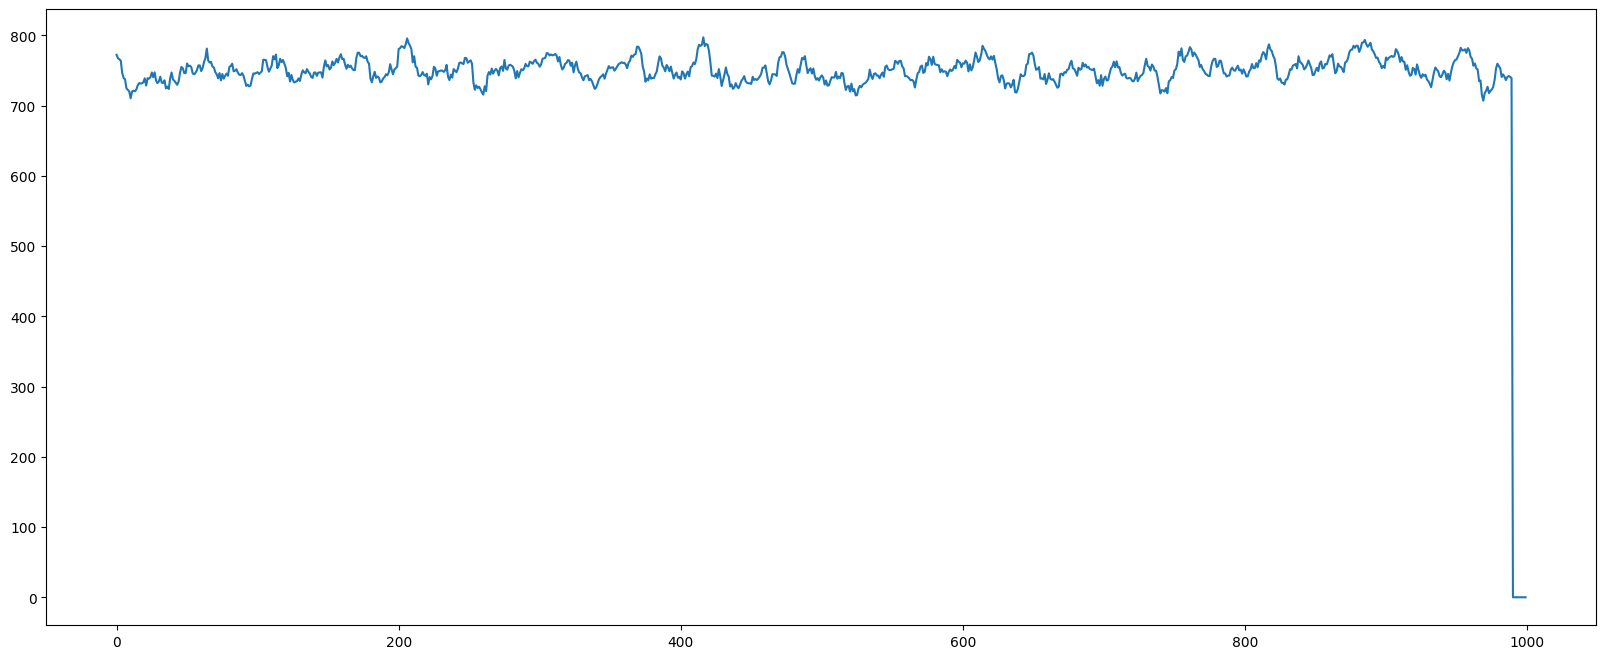

In [166]:
plt.figure(figsize=(20, 8))
plt.plot(df['FFT_Temp_0'])

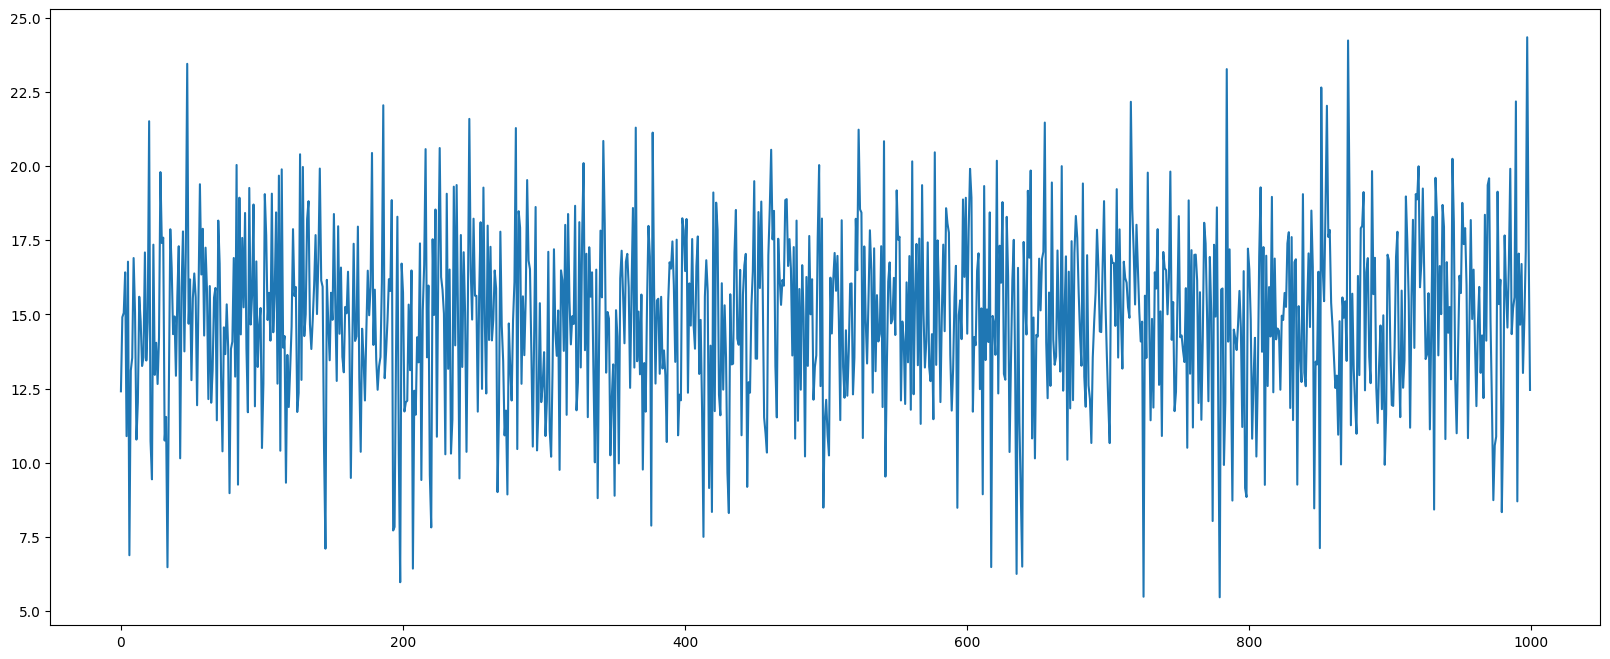

In [106]:
plt.figure(figsize=(20, 8))
plt.plot(df['Current'])

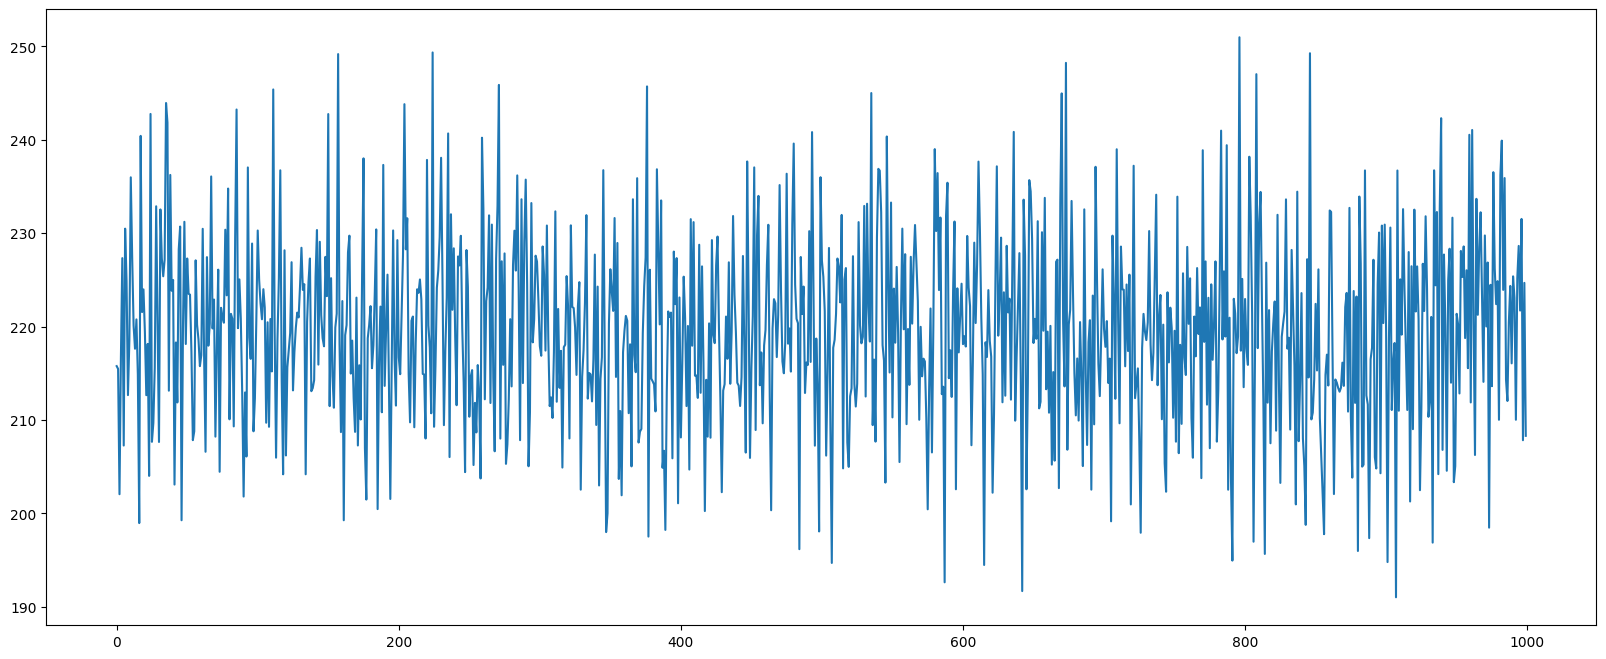

In [107]:
plt.figure(figsize=(20, 8))
plt.plot(df['Voltage'])

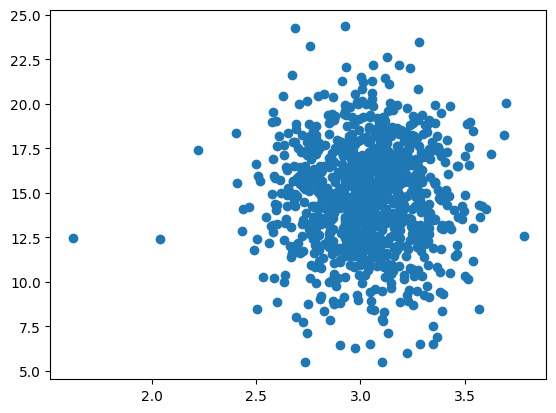

In [108]:
plt.scatter(df['Vibration'], df['Current'])

In [109]:
def make_missing_blocks(df, column, block_size=24, keep_n=1, random_state=None):
    """
    Делает искусственные пропуски в столбце df[column].
    Из каждых block_size строк оставляет только keep_n случайных значений, остальные заменяет на NaN.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    df_corrupted = df.copy()
    n = len(df)

    for start in range(1, n, block_size):
        end = min(start + block_size, n)
        block_indices = np.arange(start, end)
        
        # если в блоке меньше, чем keep_n — оставляем все
        if len(block_indices) <= keep_n:
            continue
        
        # выбираем случайные индексы, которые сохраняем
        keep_indices = np.random.choice(block_indices, size=keep_n, replace=False)
        
        # всё остальное ставим NaN
        drop_indices = np.setdiff1d(block_indices, keep_indices)
        df_corrupted.loc[drop_indices, column] = np.nan
    
    return df_corrupted

In [110]:
df.columns

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')

In [112]:
df_nan = df.copy()
# --- Примеры разных уровней плотности ---
df_nan = make_missing_blocks(df_nan, 'Flow_Rate', block_size=24, keep_n=1, random_state=0)
df_nan = make_missing_blocks(df_nan, 'Temperature', block_size=24, keep_n=3, random_state=0)
df_nan = make_missing_blocks(df_nan, 'FFT_Vib_0', block_size=24, keep_n=5, random_state=0)
df_nan = make_missing_blocks(df_nan, 'FFT_Pres_0', block_size=24, keep_n=5, random_state=0)
df_nan = make_missing_blocks(df_nan, 'FFT_Temp_0', block_size=24, keep_n=8, random_state=0)
df_nan = make_missing_blocks(df_nan, 'FFT_Temp_1', block_size=24, keep_n=8, random_state=0)

df_nan

,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0
1,NaN,2.573668,76.159843,NaN,14.906390,215.465859,NaN,NaN,NaN,NaN,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0
2,NaN,3.243491,92.372614,NaN,15.054051,202.043568,765.965069,NaN,NaN,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0
3,NaN,3.142904,94.149558,NaN,16.417891,216.699098,NaN,NaN,NaN,NaN,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0
4,NaN,3.139960,94.441006,NaN,10.899425,227.328291,NaN,NaN,NaN,NaN,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,NaN,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
996,NaN,3.035014,96.951461,NaN,17.134232,231.526481,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
997,NaN,2.925378,98.544780,NaN,24.338731,207.825962,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [113]:
pd.DataFrame(df_nan, columns=df_nan.columns).to_csv("/Users/kathrinebovkun/PycharmProjects/experiments/data/Industrial_fault_detection_with_nans.csv", index=False)

In [155]:
df_model = pd.read_csv('/Users/kathrinebovkun/PycharmProjects/experiments/data/imputed_test_result_with_trend.csv')
print(df_model.columns)
df_model

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')


,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,75.900253,3.222944,106.336292,6.441097,16.521061,222.952326,747.532947,30.907316,997.609203,8.803101,...,2.357558,2.192565,37.246343,1.788374,1.954232,29.131763,7.964686,2.885694,49.423638,0.0
1,76.001879,2.963972,105.047442,6.799412,14.827814,217.617663,741.458974,30.831033,1011.202192,6.291556,...,7.110168,1.306843,38.372766,6.809556,1.393996,29.817164,6.291556,1.944365,46.512771,0.0
2,75.964883,2.781527,104.254299,6.945187,10.813654,215.894815,744.185561,29.591212,1001.329404,2.766752,...,7.333840,1.206745,6.352842,6.783183,1.496215,18.750325,6.041231,1.958628,19.554790,0.0
3,75.871877,2.432994,100.334137,6.871377,12.876267,238.188985,741.314710,28.204049,996.305921,2.483304,...,12.493276,1.705427,17.300540,13.324415,2.277051,30.192757,1.748075,1.774268,23.005662,3.0
4,75.843112,2.465773,94.786870,8.975766,14.211760,231.771850,740.506902,26.839366,975.753431,0.546830,...,10.341684,2.495481,14.169162,15.161633,2.229631,35.290047,3.593521,1.634679,23.550472,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,75.473825,3.122151,95.858690,6.983602,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
196,70.143060,3.035014,96.951461,6.585096,17.134232,231.526481,643.291451,24.503207,781.144071,3.249593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
197,71.898683,2.925378,98.544780,6.867950,24.338731,207.825962,0.000000,23.863219,783.412944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
198,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [158]:
data = df.loc[800:, 'Temperature'].reset_index()
data

,index,Temperature
0,800,75.576434
1,801,75.085841
2,802,74.621588
3,803,73.374132
4,804,74.112311
...,...,...
195,995,75.473825
196,996,75.584630
197,997,77.158833
198,998,62.439933


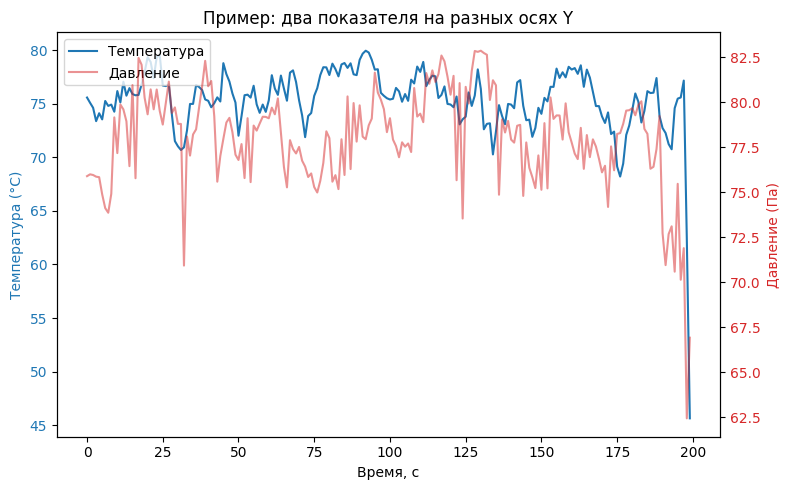

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Создаём фигуру и основную ось
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Первая ось ---
color1 = 'tab:blue'
ax1.set_xlabel('Время, с')
ax1.set_ylabel('Температура (°C)', color=color1)
ax1.plot(data['Temperature'], color=color1, label='Температура')
ax1.tick_params(axis='y', labelcolor=color1)

# --- Вторая ось (дочерняя) ---
ax2 = ax1.twinx()  # создаём вторую ось Y, общую по X
color2 = 'tab:red'
ax2.set_ylabel('Давление (Па)', color=color2)
ax2.plot(df_model['Temperature'], color=color2, label='Давление', alpha=0.5) # linestyle='--', 
ax2.tick_params(axis='y', labelcolor=color2)

# --- Легенды ---
# Чтобы объединить легенды с обеих осей:
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# --- Украшения ---
plt.title("Пример: два показателя на разных осях Y")
fig.tight_layout()  # чтобы ничего не налезало
plt.show()


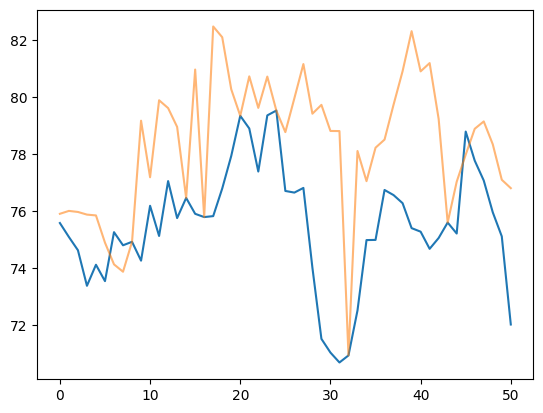

In [160]:
plt.plot(data.loc[:50, 'Temperature'])
plt.plot(df_model.loc[:50,'Temperature'], alpha=0.57)

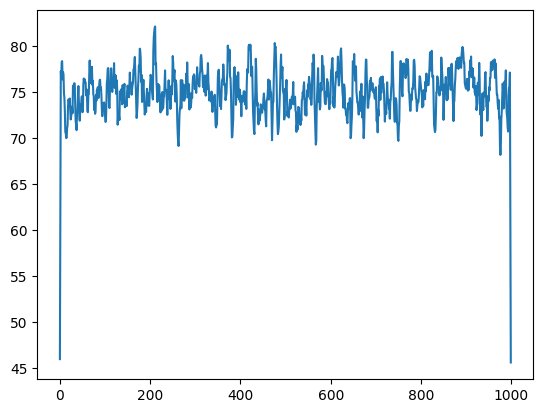

In [85]:
plt.plot(df['Temperature'])

In [154]:
df_model_ = pd.read_csv('/Users/kathrinebovkun/PycharmProjects/experiments/data/Industrial_fault_detection_with_nans_imputed.csv')
print(df_model_.columns)
df_model_

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')


,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0.0
1,NaN,2.573668,76.159843,NaN,14.906390,215.465859,NaN,NaN,NaN,NaN,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0.0
2,NaN,3.243491,92.372614,NaN,15.054051,202.043568,765.965069,NaN,NaN,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0.0
3,NaN,3.142904,94.149558,NaN,16.417891,216.699098,NaN,NaN,NaN,NaN,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0.0
4,NaN,3.139960,94.441006,NaN,10.899425,227.328291,NaN,NaN,NaN,NaN,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,12.079637,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
996,74.051638,3.035014,96.951461,12.026548,17.134232,231.526481,659.157290,29.263581,860.428008,31.495762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
997,74.256033,2.925378,98.544780,11.861105,24.338731,207.825962,0.000000,30.200450,903.990210,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаём фигуру и основную ось
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Первая ось ---
color1 = 'tab:blue'
ax1.set_xlabel('Время, с')
ax1.set_ylabel('Температура (°C)', color=color1)
ax1.plot(data['Temperature'], color=color1, label='Температура')
ax1.tick_params(axis='y', labelcolor=color1)

# --- Вторая ось (дочерняя) ---
ax2 = ax1.twinx()  # создаём вторую ось Y, общую по X
color2 = 'tab:red'
ax2.set_ylabel('Давление (Па)', color=color2)
ax2.plot(df_model_.loc['Temperature'], color=color2, label='Давление', alpha=0.5) # linestyle='--', 
ax2.tick_params(axis='y', labelcolor=color2)

# --- Легенды ---
# Чтобы объединить легенды с обеих осей:
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# --- Украшения ---
plt.title("Пример: два показателя на разных осях Y")
fig.tight_layout()  # чтобы ничего не налезало
plt.show()